In [0]:
# 피마인디언 당뇨병 예측
# 보통 당뇨병 원인은 식습관, 유전으로 꼽음

# 고립된 지역인 피마 지역의 인디언들은 고유의 혈통이 지속되어 왔지만,
# 20세기 후반 강제 이주 정책으로 인해 서구화된 식습관으로 많은 당뇨병 환자가 생겨남

In [0]:
# 다양한 머신러닝 알고리즘을 이용.
# 교차검증 방식으로 모델을 훈련시키고 예측 정확도를 평가해 줌

import sklearn
import image
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator
from sklearn.datasets import load_digits

# predictive modeling 계열 (의사결정나무, 랜덤포레스트, 로지스틱 회귀, Knearest 등) <- Kmeans 어따 빼먹음
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# 모델 검증 관련 (정확도)
from sklearn.metrics import accuracy_score

# preprocessing (전처리) 그룹
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import LabelEncoder



# pandas 출력 설정 : 출력시 가로 생략 없애기
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width',250)
pd.set_option('display.expand_frame_repr', False) 
# 바로 위 1줄이면 그 위위 2줄과 동일

from sklearn.base import BaseEstimator

from sklearn.metrics import confusion_matrix # 혼동행렬

# score류 (predictive modeling을 평가하는 지표)
from sklearn.metrics import accuracy_score # 정확도
from sklearn.metrics import precision_score # 정밀도
from sklearn.metrics import recall_score # 민감도(재현율)
from  sklearn.metrics import f1_score # F1 스코어 (정밀도, 민감도 조화평균..)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.metrics import mean_squared_error

# ROC

# Receiver Operation Characteristics Curve
# 수신자 판단 곡선

# 세계 2차 대전 통신 장비 성능 평가를 위해 고안된 수치
# 의학분야에 많이 사용되지만, 머신러닝의 이진 분류 모델 예측 성능 평가에도 사용

# 특이도(FPR)가 변할 때 민감도가 어떻게 변하는지 알아보기 위한 곡선

# 환자 중 보균자p/정상인n 있는 경우
# 재현율 : 보균자를 보균자로 양성 판정
# 특이도 : 정상인을 정상인으로 음성 판정

# -_-;;; -------------------------------------------------------------------------------


# AUC 

# Area Under Curve
# ROC 곡선 밑의 면적을 구한 값
# 1에 가까울수록 좋은 수치를 의미함

In [0]:
# diabetes 데이터셋
# => 임신횟수, 포도당 부하 검사, 혈압, 삼두근피하지방측정값, 인슐린 농도, 비만 지수, 당뇨내력가중치, 나이, 당뇨여부

In [0]:
# 로지스틱 회귀를 이용해서 당뇨병 예측에 대한 분석을 실시함.
# 오차행렬, 정확도, 정밀도, 재현율, F1스코어, ROC, AUC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
Pregnancies                 759 non-null float64
Glucose                     759 non-null float64
BloodPressure               759 non-null float64
SkinThickness               759 non-null float64
Insulin                     759 non-null float64
BMI                         759 non-null float64
DiabetesPedigreeFunction    759 non-null float64
Age                         759 non-null float64
Outcome                     759 non-null int64
dtypes: float64(8), int64(1)
memory usage: 53.4 KB
오차행렬 [[33 20]
 [12 87]]
정확도 0.7894736842105263
정밀도 0.8130841121495327
재현율 0.8787878787878788
F1 스코어 0.8446601941747572
AUC 스코어 0.8582046883933677
AUC 스코어 0.8582046883933677


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


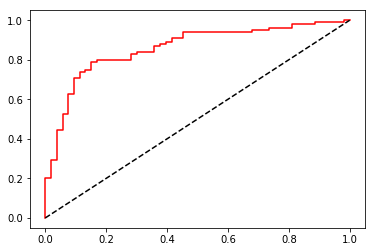

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087928,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
# 데이터 읽어오기


pima = pd.read_csv('diabetes.csv')
# pima

# 레이블 분포 확인 <---------------- 이진분류 임
pima['Outcome'].value_counts()

pima.head()
pima.tail()


# Step1. 결측치 확인!! <----------------------------  데이터 불러왔으면, 대략 내용 살펴보고 결측치 전처리!
pima.info() # 결측치는 없어보임

# Step2. data vs. target 나누기!! 독립 vs. 종속 (독립, 종속 각각을 다시 train vs. test로 분리 => 즉 총 4개로 split)

pima_target = pima['Outcome'] #bracket 해서 가져오는거 확인하시고,
pima_data = pima.drop('Outcome', axis=1) #Outcome컬럼 빼고 나머지 다 가져오기. 어찌 할 것인가? .drop이용

X_train, X_test, y_train, y_test = train_test_split(pima_data, pima_target, test_size=0.2, stratify=pima_target, random_state=1907021030)

# test_size: 검증용 데이터 개수. 1보다 작은 실수이면 비율을 나타낸다.
# train_size: 학습용 데이터의 개수. 1보다 작은 실수이면 비율을 나타낸다. test_size와 train_size 중 하나만 있어도 된다.
# random_state: 난수 시드
# stratify=종속변수 <- 당뇨병 여부 분포 비율에 맞춰 학습/평가 데이터를 각각  일정하게 나눔
# stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
# [출처] sklearn의 train_test_split() 사용법|작성자 시니피아

  
  
# Step3. {로지스틱 회귀}로 학습시킨 후 평가함 # 사용하고자 하는 예측모델 로 fit 시킨 뒤 predict 뽑아내기

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

#pred = lr_clf.predict(X_test)
pred = lr_clf.predict(X_test)


# Step4. 결과확인1 <- predict_proba로 뽑아내면 AUC스코어를 제외하고는 다 에러남 -_-;; 

print('오차행렬', confusion_matrix(y_test, pred))
print('정확도', accuracy_score(y_test, pred))
print('정밀도', precision_score(y_test, pred))
print('재현율', recall_score(y_test, pred))
print('F1 스코어', f1_score(y_test, pred))

print('AUC 스코어', roc_auc_score(y_test, pred_prop))

# Step5. 결과확인2 : AUC스코어 / plt.plot으로 시각화. 단 pred가 아닌 pred_proba를 통해 0, 1이 아닌 확률 예측값(0~1 사이)을 토해내게 함으로써 부드러운 곡선으로 표현되게끔



pred_prop = lr_clf.predict_proba(X_test)[:,1] # 이렇게 뽑아내도 되나 -_-;; 밑에 y_test는 target의 원 비율을 유지할텐데(stratify), 좌측은 1이라 예측하는
# 확률인디 -_-;;

print('AUC 스코어', roc_auc_score(y_test, pred_prop))

fprs, tprs, thresholds = roc_curve(y_test, pred_prop)
plt.plot(fprs, tprs, 'r-', label='ROC')
plt.plot([0,1], [0,1], 'k--', label='boundary') # %이기 때문에 0~1 사이 값을 가지기에 수직/수평 축 또한 해당 범위로 제한을 둠
plt.show()

# => 지표가 좋게 나온 것은 아님
# => 데이터를 다시 살펴봐서 전처리할 내용여부 확인 또는 다른 알고리즘을 적용해 볼 것 -_-;;

# Step6. pima 데이터 다시 확인
pima.describe()

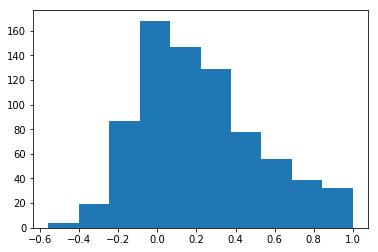

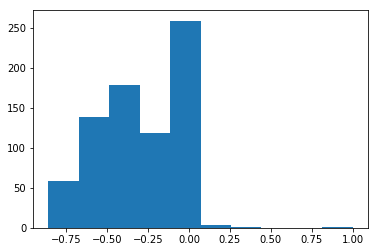

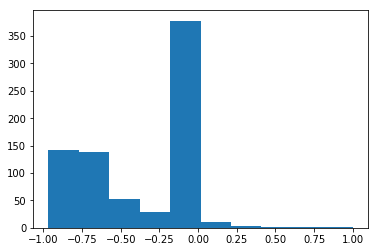

In [95]:
# 히스토그램으로 0 비율이 어느정도인지 확인
plt.hist(pima_data['Glucose'])
plt.show()

plt.hist(pima_data['SkinThickness'])
plt.show()

plt.hist(pima_data['Insulin'])
plt.show()

In [96]:
# 결과 해석 유의!! 정제되지 않은 순수 데이터에서는 누락치가 많이 존재. 혈당, 혈압, 지방측정값, 인슐린, 비만지수 등이 0임
# 각 변수 별 0값의 분포 및 비율 확인. 이것을 통해 0을 대체값으로 채울지 아니면 과감하게 제거할지 결정


print(pima_data[pima_data['Glucose']==0].count()) # Glucose 컬럼 내 값이 0인 행의 수 출력 (모든 컬럼 다 나옴)
print('-----------------------------------------------------') 
print(pima_data[pima_data['Glucose']==0]['Glucose'].count()) # 위 코드에서 Glucose만 따로 뽑아냄
print('-----------------------------------------------------') 

check_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


total2 = pima_data['BMI'].shape   # 비율계산을 위해 전체 갯수 계산

print(pima_data.shape)
print('-----------------------------------------------------') 

print(total2)
print('-----------------------------------------------------') 

total1 = pima_data['BMI'].shape[0]   # 비율계산을 위해 전체 갯수 계산
print(total1)
print('-----------------------------------------------------') 
for feature in check_features:
  zerocount = pima_data[pima_data[feature] == 0]['Glucose'].count()
  print('{0}: 총 건수 {1}, 비율 {2:.2f}%'.format( # 세번째, 즉 2 뒤에 포멧 .2f 지정 시 : 로 이어줌에 유의
      feature, zerocount, 100 * zerocount/total1))
print('-----------------------------------------------------') 
pima_data.head()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
dtype: int64
-----------------------------------------------------
5
-----------------------------------------------------
(759, 8)
-----------------------------------------------------
(759,)
-----------------------------------------------------
759
-----------------------------------------------------
Glucose: 총 건수 5, 비율 0.66%
BloodPressure: 총 건수 35, 비율 4.61%
SkinThickness: 총 건수 224, 비율 29.51%
Insulin: 총 건수 371, 비율 48.88%
BMI: 총 건수 11, 비율 1.45%
-----------------------------------------------------


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [97]:
#  지방 측정값과 인슐린의 0값 비율이 제법 크므로 이들의 평균값을 대체값으로 채워 넣음
pima_data[check_features] = pima_data[check_features].replace(0,pima_data[check_features].mean())

# 대체값으로 채운 결과 다시 확인
print(pima_data.describe())
# 각 변수의 값 범위가 10단, 100단위로 다름 # => 따라서, 변수 값의 범위를 일정하게 만드는 전처리 필요!!
print('----------------------------------------------------------------')

scaler = StandardScaler()
pima_data_scaled = scaler.fit_transform(pima_data)

print(pd.DataFrame(pima_data_scaled).describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin         BMI  DiabetesPedigreeFunction         Age
count   759.000000  759.000000     759.000000     759.000000  759.000000  759.000000                759.000000  759.000000
mean     -0.407657    0.220003       0.184644      -0.375243   -0.481678   -0.032712                 -0.663253   -0.516162
std       0.386260    0.305901       0.197514       0.186234    0.254477    0.205339                  0.283056    0.400794
min      -0.882353   -0.557789      -0.606557      -0.858586   -0.966903   -0.457526                 -0.994876   -0.966667
25%      -0.764706   -0.005025       0.049180      -0.494949   -0.716312   -0.178837                 -0.858241   -0.866667
50%      -0.529412    0.175879       0.180328      -0.292929   -0.323534   -0.034277                 -0.747225   -0.633333
75%       0.000000    0.407035       0.311475      -0.289735   -0.323534    0.087928                 -0.531597   -0.233333
max       1.0000

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


오차행렬 [[32 21]
 [14 85]]
정확도 0.7697368421052632
정밀도 0.8018867924528302
재현율 0.8585858585858586
F1 스코어 0.8292682926829269
AUC 스코어 0.4894225271583762
AUC 스코어 0.8189441585668


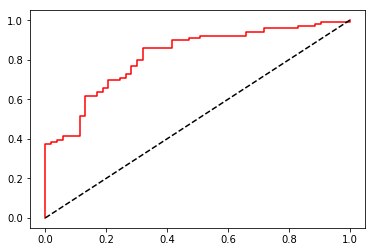

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000,759.000000
mean,-0.407657,0.218563,0.176505,-0.289735,-0.323534,-0.032245,-0.663253,-0.516162,0.653491
std,0.386260,0.306419,0.201287,0.258480,0.375544,0.205376,0.283056,0.400794,0.476171
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.178837,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.747225,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087928,-0.531597,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
# 로지스틱 회귀 분석 다시 실시 (정규화 한 후 다시) ----------------------------------------------------------------------------------



# Step2. data vs. target 나누기!! 독립 vs. 종속 (독립, 종속 각각을 다시 train vs. test로 분리 => 즉 총 4개로 split)

X_train, X_test, y_train, y_test = train_test_split(pima_data_scaled, pima_target, test_size=0.2, stratify=pima_target, random_state=1907021150)

# test_size: 검증용 데이터 개수. 1보다 작은 실수이면 비율을 나타낸다.
# train_size: 학습용 데이터의 개수. 1보다 작은 실수이면 비율을 나타낸다. test_size와 train_size 중 하나만 있어도 된다.
# random_state: 난수 시드
# stratify=종속변수 <- 당뇨병 여부 분포 비율에 맞춰 학습/평가 데이터를 각각  일정하게 나눔
# stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
# [출처] sklearn의 train_test_split() 사용법|작성자 시니피아




# Step3. {로지스틱 회귀}로 학습시킨 후 평가함 # 사용하고자 하는 예측모델 로 fit 시킨 뒤 predict 뽑아내기

lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

#pred = lr_clf.predict(X_test)
pred = lr_clf.predict(X_test)


# Step4. 결과확인1 <- predict_proba로 뽑아내면 AUC스코어를 제외하고는 다 에러남 -_-;; 

print('오차행렬', confusion_matrix(y_test, pred))
print('정확도', accuracy_score(y_test, pred))
print('정밀도', precision_score(y_test, pred))
print('재현율', recall_score(y_test, pred))
print('F1 스코어', f1_score(y_test, pred))

print('AUC 스코어', roc_auc_score(y_test, pred_prop))

# Step5. 결과확인2 : AUC스코어 / plt.plot으로 시각화. 단 pred가 아닌 pred_proba를 통해 0, 1이 아닌 확률 예측값(0~1 사이)을 토해내게 함으로써 부드러운 곡선으로 표현되게끔



pred_prop = lr_clf.predict_proba(X_test)[:,1] # 이렇게 뽑아내도 되나 -_-;; 밑에 y_test는 target의 원 비율을 유지할텐데(stratify), 좌측은 1이라 예측하는
# 확률인디 -_-;;

print('AUC 스코어', roc_auc_score(y_test, pred_prop))

fprs, tprs, thresholds = roc_curve(y_test, pred_prop)
plt.plot(fprs, tprs, 'r-', label='ROC')
plt.plot([0,1], [0,1], 'k--', label='boundary') # %이기 때문에 0~1 사이 값을 가지기에 수직/수평 축 또한 해당 범위로 제한을 둠
plt.show()

# => 지표가 좋게 나온 것은 아님
# => 데이터를 다시 살펴봐서 전처리할 내용여부 확인 또는 다른 알고리즘을 적용해 볼 것 -_-;;

# Step6. pima 데이터 다시 확인
pima.describe()

In [102]:
# scikit-learn에서 제공하는 피마인디언 당뇨병 데이터

from sklearn.datasets import load_diabetes


diabetes = load_diabetes()

#print(diabetes)

df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01
